In [1]:
import pandas as pd
import numpy as np
import math
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system

In [2]:
def parseTxtChargeScan(file):
    channel = []
    tw_m = []
    tw_s = []
    
    num_points = 0
    points = []

    with open(file, 'rt') as myfile:
        lines = myfile.readlines()
    
        for i in range(0, len(lines)):
            if("x points") in lines[i]:
                num_points = int(lines[i].split()[2])
                for j in range(1,num_points+1):
                    points.append(float(lines[i+j].split()[0]))
        
            if("eff_data") in lines[i]:
                channel.append(int(lines[i].split()[1]))
            
                tw = []
                ts = []
                for j in range(1,num_points+1):
                    if(lines[i+j].split()[3] == "NaN" or lines[i+j].split()[4] == "NaN"):
                        tw.append(np.NAN)
                        ts.append(np.NAN)
                    else:
                        tw.append(float(lines[i+j].split()[3]))
                        ts.append(float(lines[i+j].split()[4]))

                tw_m.append(tw)    
                tw_s.append(ts)
    return pd.DataFrame(list(zip(channel, tw_m, tw_s)), columns = ["Channel", "tw_m", "tw_s"]), points 

In [3]:
def calcolaMedie(data):
        tiwal = data['tw_m'].values.tolist()
        
        minimi = [] #baselines
        deltas = []
        for i in tiwal:
            minim = np.nanmin(i)
            minimi.append(minim)
                    
            delta = [round(t-minim,3) for t in i]
            deltas.append(delta)
       
        D = pd.DataFrame(deltas)
        means = []
        for i in range(0, len(D.columns)):
            colonna = D.iloc[:, i]
            tot_nan_per_colonna = colonna.isna().sum() 
            if(tot_nan_per_colonna>= len(D)/2):
                means.append(np.nan)
            else:
                media_colonna = round(np.nanmean(colonna.tolist()),3)
                if(media_colonna>50):
                    means.append(np.nan)
                else:
                    means.append(media_colonna) #escludo qualunque misura abbia un nan (altrimenti nanmean)

        #       somma = 0
        #       for i in colonna.tolist():
        #           somma += i
        #        print(somma/len(colonna.tolist()))
        

        return means        

In [9]:
import matplotlib.pyplot as plt

def plotTimeWalkMedio(dataA, dataB, x, soglia):    

    fig, ax = plt.subplots(figsize = (14, 8))
    fig.suptitle("Time Walk medio soglia "+ soglia + " elettroni")

    tw_medio_A = calcolaMedie(dataA)
    tw_medio_B = calcolaMedie(dataB)
    #print("A----> "+str(tw_medio_A))
    #print("\nB----> "+str(tw_medio_B))
    
    ax.plot(x,tw_medio_A , color = "blue")
    ax.plot(x, tw_medio_B, color = "red")
    ax.plot([0, 600], [25,25], "r--", color = "grey")
    
    a = np.arange(0,45+1,10).tolist()
    b = np.arange(60, int(max(points))+20, 20).tolist()
    
    for x in b:
        a.append(x)
    
    ax.set_xticks(a)
    #ax.set_yticks(np.arange(0, 45, 2))
    
    ax.set_xlabel("Delta CalHI (mV)")
    ax.set_ylabel("Delta Time Walk (ns)")

    ax.legend([("RD53A"),("RD53B")])
    ax.annotate( "25ns",xy=(0, 0), xytext=(605, 25))
   
    elemA = next(x for x in tw_medio_A if x< 26.0 and x>24.0) #considero l'istante precedente alla fine del bunch
    print("elemA -- "+ str(elemA))
    indiceA = tw_medio_A.index(elemA)
    print("indiceA -- "+ str(indiceA))
  
    elemB = next(x for x in tw_medio_B if x< 27.0 and x>22.2)
    print("elemB -- "+ str(elemB))
    
    indiceB = tw_medio_B.index(elemB)
    print("indiceB -- "+ str(indiceB))
    
    ax.annotate( "("+str(np.round(elemA,1))+"ns,\n"+str(indiceA)+"mV)\n ~"+str(indiceA*50)+"e-",xy=(indiceA+5, 24.5), xytext=(50, 18), arrowprops=dict(facecolor='black', arrowstyle="->"))
    ax.annotate(  "("+str(np.round(elemB,1))+"ns,\n"+str(indiceB)+"mV)\n ~"+str(indiceB*50)+"e-",xy=(indiceB, 24.5), xytext=(-10, 18), arrowprops=dict(facecolor='black', arrowstyle="->"))
    
    """
    plt.savefig('TimeWalk medio soglia '+soglia+'.png', bbox_inches='tight')
    """
    
    plt.show()    
    """
    print(tw_medio_A)
    print("\n")
    print(tw_medio_B)
    """

In [10]:
def filterAB(dataframe):
    dataA = dataframe.loc[(dataframe['Channel'] >= 1) & (dataframe['Channel']<=127)] 
    dataB = dataframe.loc[(dataframe['Channel'] >= 128) & (dataframe['Channel']<=239)]
    return dataA, dataB

# Misura per soglia 1500 elettroni con capacità CD=100fF

In [6]:
button1500 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_100_LDAC_14_soglia_1500.txt


elemA -- 24.886
indiceA -- 37
elemB -- 22.279
indiceB -- 33


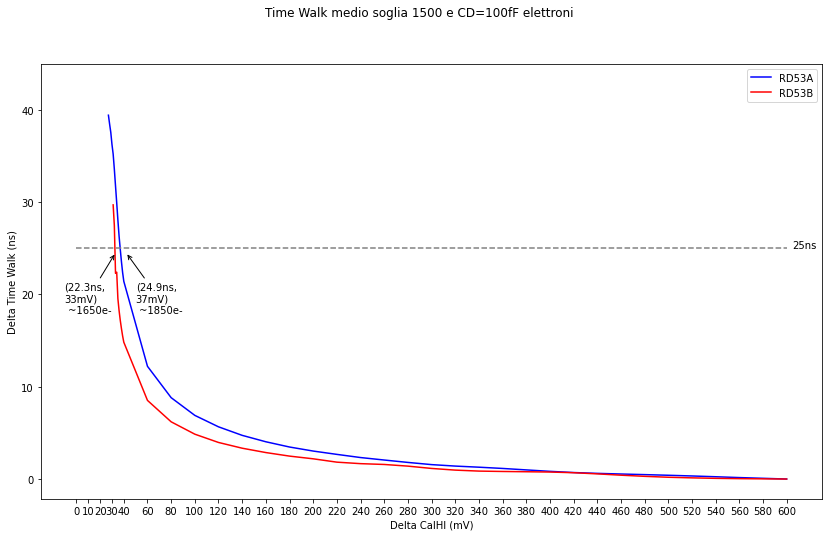

In [11]:
dataframe1500, points = parseTxtChargeScan(button1500.files[0])
dataA1500, dataB1500 = filterAB(dataframe1500)
plotTimeWalkMedio(dataA1500, dataB1500, points, "1500 e CD=100fF")

# Misura per soglia 1200 elettroni con capacità CD=100fF

In [12]:
button1200 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_100_LDAC_14_soglia_1200.txt


elemA -- 24.92
indiceA -- 31
elemB -- 24.998
indiceB -- 27


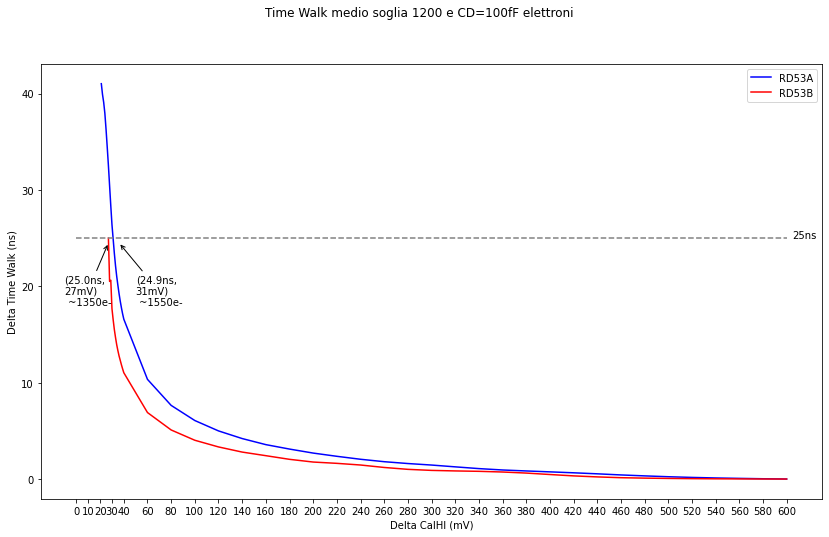

In [13]:
dataframe1200, points = parseTxtChargeScan(button1200.files[0])
dataA1200, dataB1200 = filterAB(dataframe1200)
plotTimeWalkMedio(dataA1200, dataB1200, points, "1200 e CD=100fF")

# Misura per soglia 1000 elettroni con capacità CD=50fF

In [14]:
button1000 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_50_LDAC_14_soglia_1000.txt


elemA -- 25.504
indiceA -- 23
elemB -- 23.2
indiceB -- 17


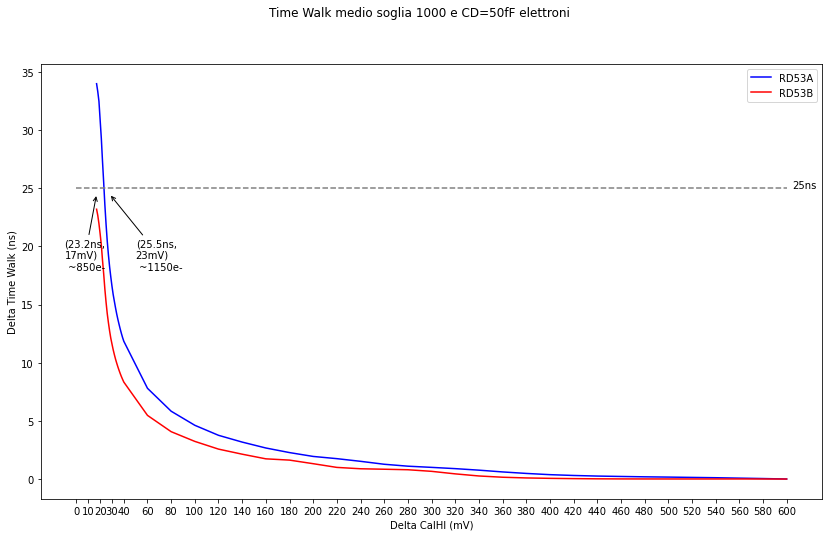

In [15]:
dataframe1000, points = parseTxtChargeScan(button1000.files[0])
dataA1000, dataB1000 = filterAB(dataframe1000)
plotTimeWalkMedio(dataA1000, dataB1000, points, "1000 e CD=50fF")

# Test in-time threshold 1200 elettroni

In [16]:
buttonIn1200 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/INTIME/ChargeScan_INTIMETH_1200_PREAMP_30_CD_100_LDAC_14.txt


elemA -- 25.791
indiceA -- 24
elemB -- 25.149
indiceB -- 25


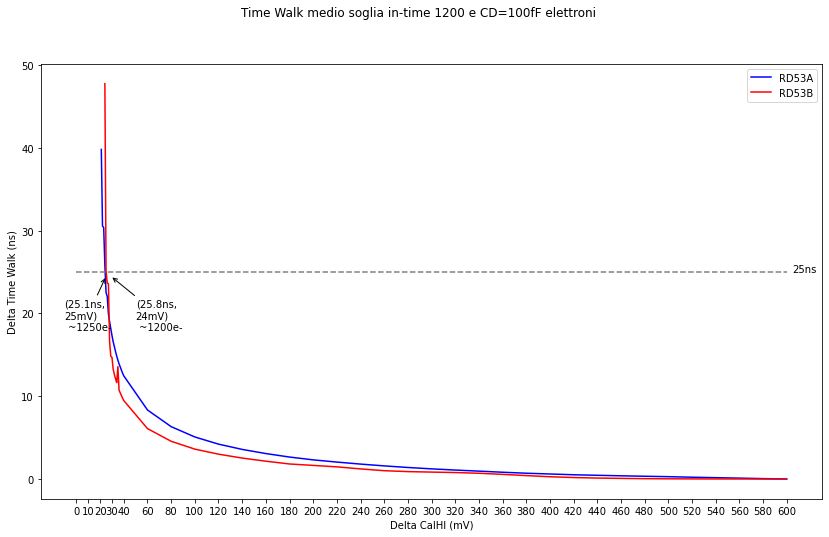

In [17]:
dataframeIN, points = parseTxtChargeScan(buttonIn1200.files[0])
dataAin, dataBin = filterAB(dataframeIN)
plotTimeWalkMedio(dataAin, dataBin, points, "in-time 1200 e CD=100fF")